## Random forest Assignment

In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.


In [123]:
#Following the code to get data into the environment:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

In [74]:
boston = datasets.load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
house_price = boston.target

In [75]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [76]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [77]:
h_p = pd.Series(house_price)

In [78]:
bostonDF['house_price'] = h_p

In [79]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [80]:
bostonDF.isna().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
house_price    0
dtype: int64

NO NULL Values

<AxesSubplot:>

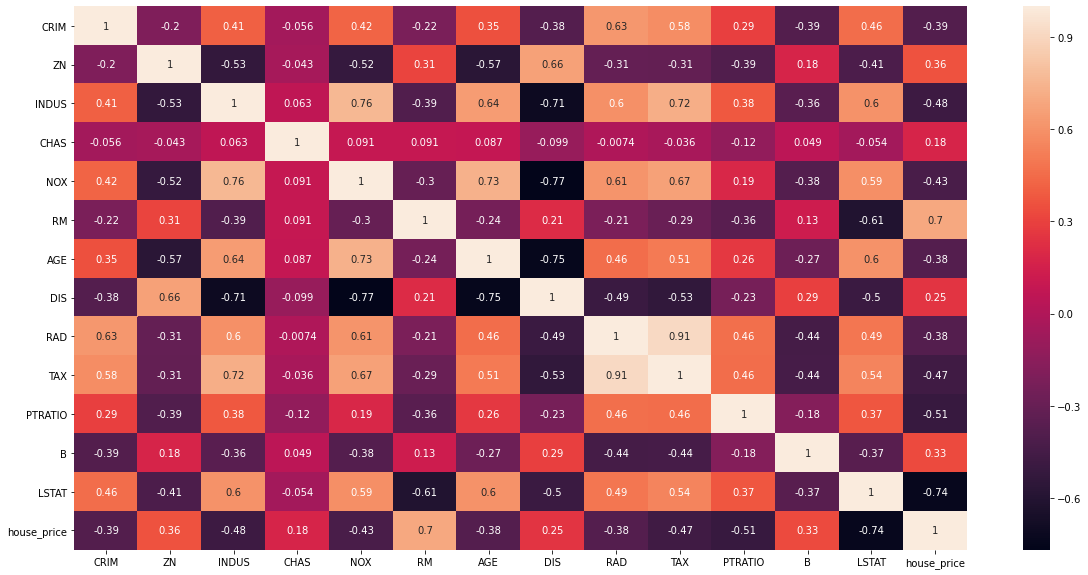

In [81]:
correlation = bostonDF.corr()
plt.figure(figsize = (20,10))
sns.heatmap(correlation,annot = True)

##### we can see that there is a positive correlation between House price and RM , Negative correlation between house price ande LSTAT

##### Also between the independent features RAD ,TAX are the most correlated .

Text(0, 0.5, 'House_price')

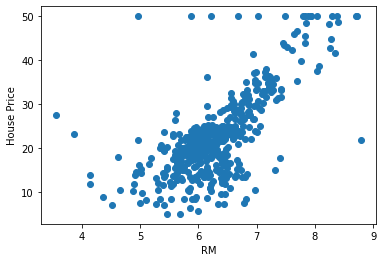

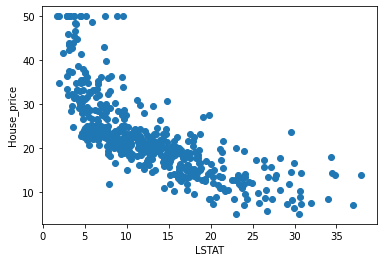

In [84]:
target_var = bostonDF['house_price']

plot1 = plt.figure(1)
plt.scatter(bostonDF['RM'],target_var)
plt.xlabel('RM')
plt.ylabel('House Price')

plot2 = plt.figure(2)
plt.scatter(bostonDF['LSTAT'],target_var)
plt.xlabel('LSTAT')
plt.ylabel('House_price')

##### We Should see the most important features to extract more info!! ...For that we need feature column and label column

In [71]:
X = bostonDF.drop(columns='house_price',axis = 1)
y = bostonDF['house_price']

In [93]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [99]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [98]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: house_price, Length: 506, dtype: float64

In [106]:
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\lahari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [107]:
model.feature_importances_

array([0.04047685, 0.00261496, 0.034189  , 0.01399932, 0.03664746,
       0.3836146 , 0.01785965, 0.02679808, 0.00989925, 0.06935391,
       0.02896508, 0.01886446, 0.31671739])

<function matplotlib.pyplot.show(close=None, block=None)>

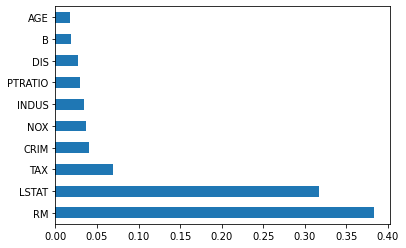

In [110]:
important_features = pd.Series(model.feature_importances_,index = X.columns)
important_features.nlargest(10).plot(kind = 'barh')
plt.show

##### Among the top 10 largest important features RM and LSTAT tops the list...same as we have observed before in the correlation heatmap.

##### Regressor models perform much better in case of less no of columns but with most inportant columns

In [111]:
model.feature_importances_

array([0.04047685, 0.00261496, 0.034189  , 0.01399932, 0.03664746,
       0.3836146 , 0.01785965, 0.02679808, 0.00989925, 0.06935391,
       0.02896508, 0.01886446, 0.31671739])

In [113]:
important_features = pd.Series(model.feature_importances_,index = X.columns)
important_features

CRIM       0.040477
ZN         0.002615
INDUS      0.034189
CHAS       0.013999
NOX        0.036647
RM         0.383615
AGE        0.017860
DIS        0.026798
RAD        0.009899
TAX        0.069354
PTRATIO    0.028965
B          0.018864
LSTAT      0.316717
dtype: float64

In [114]:
X = X.drop(columns = ['ZN','CHAS','RAD'])


In [115]:
X

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [116]:
# Splitting the dataset into Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [120]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [121]:
y_pred = regressor.predict(X_test)

In [124]:
metrics.r2_score(y_test,y_pred)

0.88534443460777

##### We  got an accuracy of 88.5%

##### No need of standardizing the data set.Random forest will be able to handle the scaling part and also its immune to outliers...
 